<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/9/95/Continuous_wavelet_transform.gif" alt="Demo of different wavelets matching signals on Wikipedia" />
</p>

# Wavelet Basics

---

## Overview

1. Prerequistites
2. Background
3. Load .wav File for Audio
4. Fourier Transform - Frequency, but not Time
6. Wavelet Transform - Frequency and Time
7. Wavelet Terminology

## Prerequisites
| Concepts | Importance | Notes |
| --- | --- | --- |
| [Intro to Matplotlib](https://foundations.projectpythia.org/core/matplotlib/matplotlib-basics.html) | Necessary | Used to plot data |
| [Intro to Pandas](https://foundations.projectpythia.org/core/pandas/pandas.html) | Necessary | Used to read in and organize data (in particular dataframes) |
| [Intro to Numpy](https://foundations.projectpythia.org/core/numpy/numpy-basics.html)| Necessary | Used to work with large arrays |
| [Intro to SciPy](https://docs.scipy.org/doc/scipy-1.13.1/tutorial/fft.html) | Helpful | Used to work with .wav files and built-in Fast Fourier Transform |

- **Time to learn**: 45 minutes

## Background
Time-series data refers to data recorded in successive time intervals. For example, imagine a short piece of music. Each note in the piece can be any note from A to G and varies based on frequency to produce different pitches. A higher frequency is associated with a higher pitch, like an A note, while a lower frequency is associated with a lower pitch, like a C note.

Fourier Transform is a common tool to analysis and pull out which frequencies are present in a signal. With tools like Fourier Transform, we can easily distinguish and determine if a B and a D note appear in the piece of music. However, this does not encapulsate all the information from a signal. 

**Most importantly, what is the order?**

The musical piece "BDDB" is very different from "DDDDBD" while they both share the same notes B and D. The time and order of data is lost when relying only on signal processing tools like Fourier Transform. Wavelets offer a powerful opportunity for signal analysis to return both information about the frequency and information about the time when the frequency occurred.

---

## Imports

In [1]:
import pywt                                 # PyWavelets
import numpy as np                          # working with arrays
import pandas as pd                         # working with dataframes
from scipy.io import wavfile                # loading in .wav files
import matplotlib.pyplot as plt             # plot data (fourier transform and wav files)
from scipy.fftpack import fft, fftfreq      # working with Fourier Transforms

---

## Load .wav File for Audio

### Load .wav file data

For this example, we will be using a short .wav file (jingle_bells.wav) that contains the first few notes of "Jingle Bells".

We can load in the `jingle_bell.wav` file with the `scipy.io.wavfile()` function. This `scipy` function will return both the sample rate of the data and the frequency of the data.

The length of the .wav file can be determined as a ratio of the length of the file and the sample rate to determine the duration in seconds.

In [4]:
sample_rate, signal_data = wavfile.read('../data/jingle_bells.wav')

# Determine the total duration and length of .wav file
duration = len(signal_data) / sample_rate
time = np.arange(0, duration, 1/sample_rate) 

In [16]:
print(f"Sample Rate: {sample_rate}")
print(f"Duration = {duration} seconds")

Sample Rate: 10000
Duration = 15.6991 seconds


### Convert .wav file to pandas dataframe

Currently, the `signal_data` is stored as a numpy array, but to make it easy to plot, we will store the .wav file as a `pandas` dataframe. This will also associate the specific time (in seconds) with the `signal_data` amplitude.

In [21]:
signal_df = pd.DataFrame({'time (seconds)': time, 'amplitude': signal_data})
signal_df.head()

,time (seconds),amplitude
0,0.0000,-417
1,0.0001,-2660
2,0.0002,-2491
3,0.0003,6441
4,0.0004,-8540


### Plot a Small Sample of the .wav File

With the data stored as a dataframe, it will be simple to plot and view in `matplotlib`. We can view the first 400 data points (0.04 seconds) as a simple line graph to view the rapidly changing amplitudes.

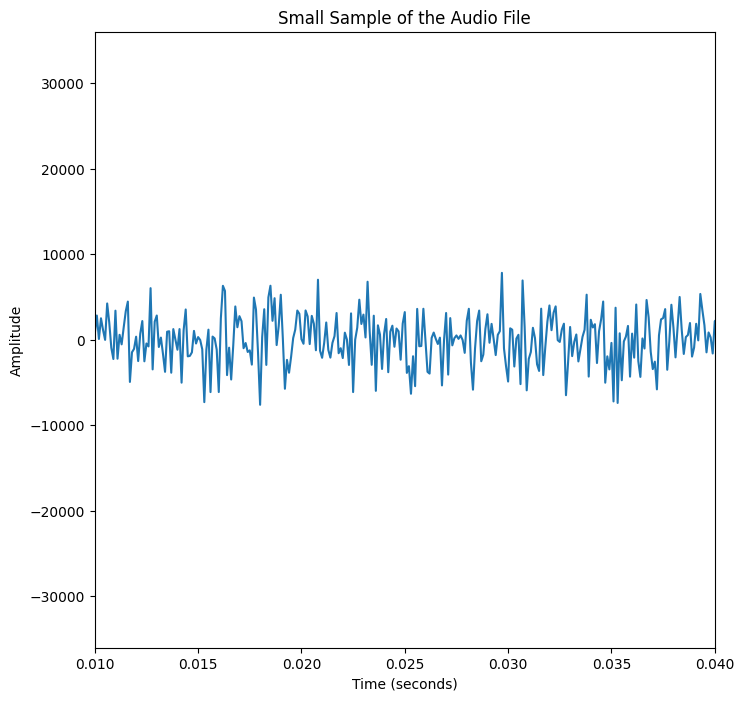

In [22]:
fig, ax = plt.subplots(figsize=(8, 8))
fig = plt.plot(signal_df["time (seconds)"], signal_df["amplitude"])
ax.set_xlim(signal_df["time (seconds)"][100], signal_df["time (seconds)"][400])
plt.title("Small Sample of the Audio File")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

## Fourier Transform - Frequency, but not Time

### Advantages (and Disadvantages) of Fourier Transform

The first step of processing new signal data is to develop a basic understanding of the kinds of frequencies that are present. This will help us to answer some important questions:
- Are there prevailing patterns?
- Is one frequency more dominant?
- How much do the dominant frequencies overcome background noise?

Fourier Transform is a common tool that can be used to determine which frequencies are present from raw data. For this "Jingle Bells" musical example, a Fourier Transform will return the frequencies of all the notes that are present. 

Jingle Bells is a simple musical piece that is taught to beginners and children since it can be entirely played with one hand on the piano. For the purpose of this example, we will be analyzing the first three lines of "Jingle Bells":

```
"Jingle Bells, Jingle Bells, Jingle All the Way" as EEE EEE EGCDE
```

### Fast Fourier Transform of Signal Data

To find determine what notes are present, we can first apply Fast Fourier Transform to the .wav file data with the `scipy.fftpack.fft()` and `scipy.fftpack.fftfreq()` fucntions in `scipy`. These will both return `numpy` arrays with information about which frequencies are present in the .wav file as well as how frequently they appear.

In [9]:
# Apply FFT to Input Data
fourier_transform = abs(fft(signal_data))
freqs = fftfreq(len(fourier_transform), (1/sample_rate))

### Plot Frequency Prevalence from Fast Fourier Transform

To begin, we can plot the Fourier Transform with relation to how frequent a frequency appears.

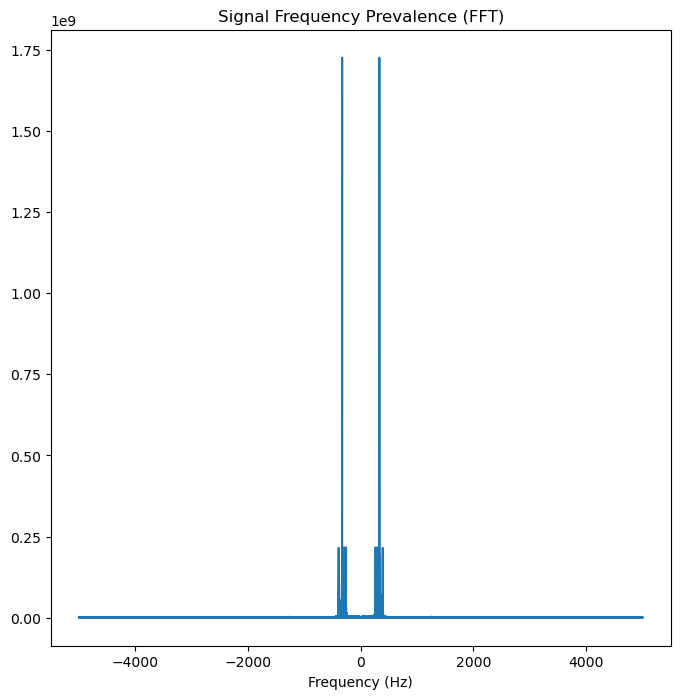

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(freqs, fourier_transform)
plt.title("Signal Frequency Prevalence (FFT)")
plt.xlabel('Frequency (Hz)')
plt.show()

### Only plot positive Frequencies (hz) in range of notes (200-500)

You might have noticed that the frequencies are mirrored across the 0 Hz, so for simplicity sake, we can zoom in and only pay attention to the relevant range of frequencies. For this example, we will pay attention the postive frequencies between the range frequencies of 200 to 500 Hz.

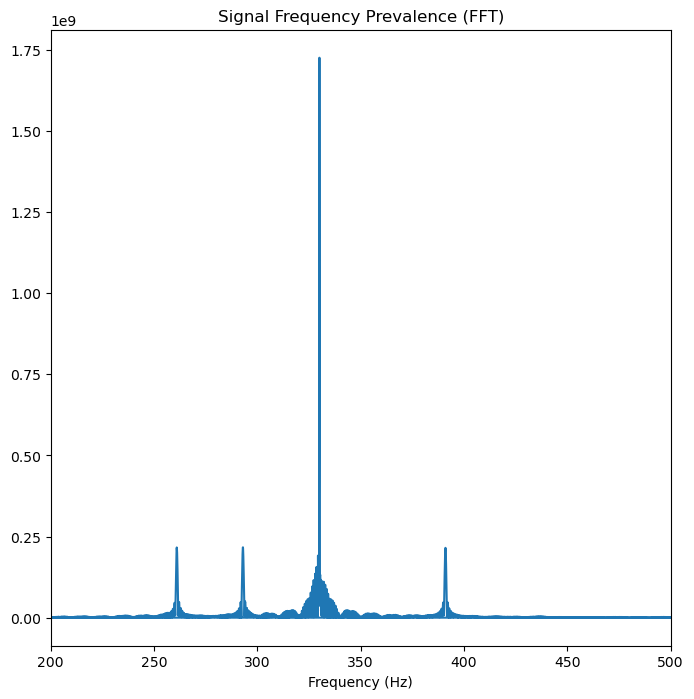

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(freqs, fourier_transform)
ax.set_xlim(left=200, right=500) 
plt.title("Signal Frequency Prevalence (FFT)")
plt.xlabel('Frequency (Hz)')
plt.show()

### Plot Fast Fourier Transform for Frequency Prevalence with Frequency of Notes

We can already start to see the peaks in our data that represent the frequencies in the signal data. There are four apparent peaks, but what notes do they represent?

In [14]:
# Note frequency in hz
a_freq = 440
b_freq = 494
c_freq = 261
d_freq = 293
e_freq = 330
f_freq = 350
g_freq = 392

Let us overlay the possible frequencies (A to G) on the plot to visually see which frequencies are present.

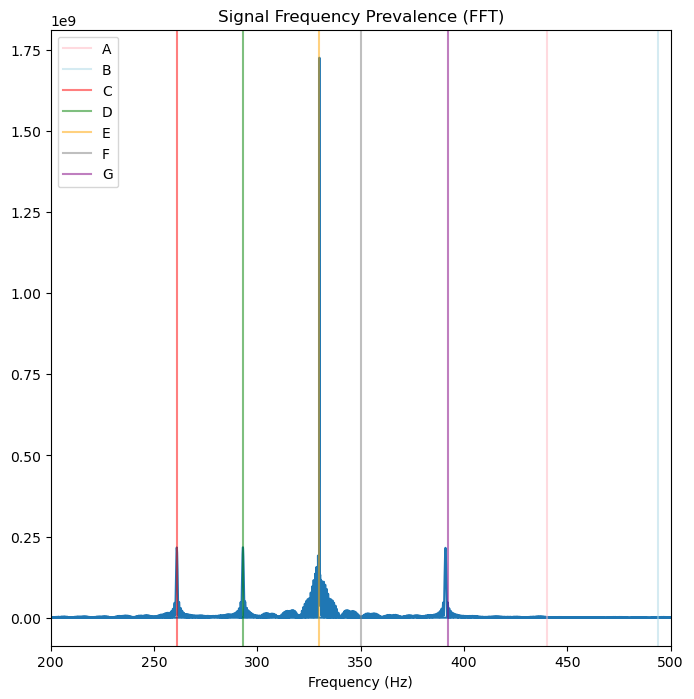

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(freqs, fourier_transform)
ax.set_xlim(left=200, right=500) 
plt.axvline(x=a_freq, color="lightpink", label="A",alpha=0.5) # A note: 440 hz
plt.axvline(x=b_freq, color="lightblue", label="B",alpha=0.5) # B Note: 494 hz
plt.axvline(x=c_freq, color="red", label="C",alpha=0.5)       # C Note: 261 hz
plt.axvline(x=d_freq, color="green", label="D",alpha=0.5)     # D Note: 293 hz
plt.axvline(x=e_freq, color="orange", label="E",alpha=0.5)    # E Note: 330 hz
plt.axvline(x=f_freq, color="grey", label="F",alpha=0.5)      # F Note: 350 hz
plt.axvline(x=g_freq, color="purple", label="G",alpha=0.5)    # G Note: 392 hz
plt.title("Signal Frequency Prevalence (FFT)")
plt.xlabel('Frequency (Hz)')
plt.legend()
plt.show()

### Fast Fourier Transform Predicts Four Notes

The overlays are working! We can see that the four notes that we predicted from Jingle Bells (C, D, E, and G) are present.

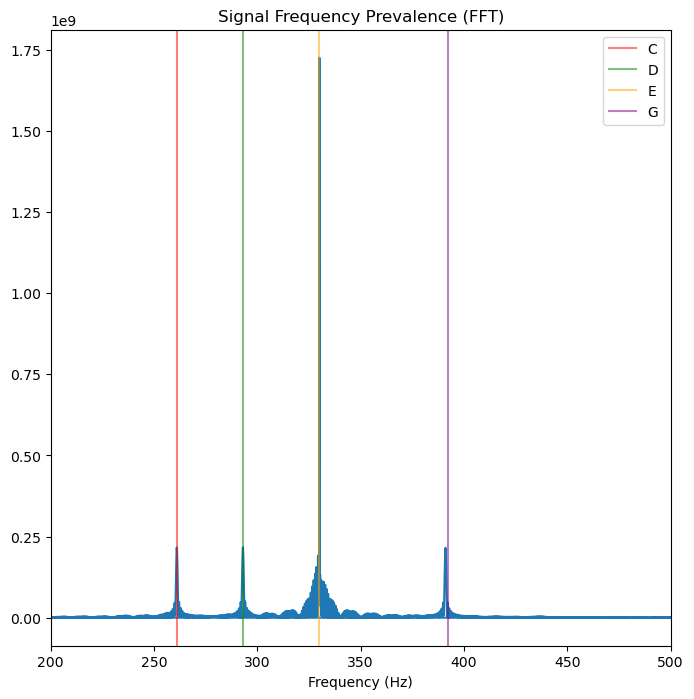

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(freqs, fourier_transform)
ax.set_xlim(left=200, right=500) 
plt.axvline(x=c_freq, color="red", label="C",alpha=0.5)    # C Note: 261 hz
plt.axvline(x=d_freq, color="green", label="D",alpha=0.5)  # D Note: 293 hz
plt.axvline(x=e_freq, color="orange", label="E",alpha=0.5) # E Note: 330 hz
plt.axvline(x=g_freq, color="purple", label="G",alpha=0.5) # G Note: 391 hz
plt.title("Signal Frequency Prevalence (FFT)")
plt.xlabel('Frequency (Hz)')
plt.legend()
plt.show()

### Now What?

Fourier Transform has been able to illustrate that there are four notes: C, D, E, and G. But what order are the notes in? And how frequently is each note used? Fourier Transform can only give information about the frequency and a ratio of how prevalent a note is—for example, in Jingle Bells, E is significantly more common than any other note.

### But to determine **both** frequency **and** time, you'll need a different tool: **wavelets!**

## Wavelet Transform - Frequency and Time

### What is a Wavelet?

A wavelet is a short wave-like oscillation that averages out to zero.

<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0a/MorletWaveletMathematica.svg/1024px-MorletWaveletMathematica.svg.png" alt="Morlet Wavelet on Wikipedia" width=350/>
</p>

> Many signals and images of interest exhibit piecewise smooth behavior punctuated by transients. Speech signals are characterized by short bursts encoding consonants followed by steady-state oscillations indicative of vowels. Natural images have edges. Financial time series exhibit transient behavior, which characterize rapid upturns and downturns in economic conditions. Unlike the Fourier basis, wavelet bases are adept at sparsely representing piecewise regular signals and images, which include transient behavior.
> 
> [Mathworks](https://www.mathworks.com/help/wavelet/gs/what-is-a-wavelet.html): "What is a Wavelet"

Fourier transforms are made up of multiple sine waves of different and various frequencies to best match a signal. However, while Fourier transforms can be used to match frequency, information about when each frequency occurs in the signal is lost. This can be overcome with wavelet analysis. Like Fourier, wavelet works with multiple different wavelets that will be scaled up or down to produce different shaped wavelets that can shifted along the signal. Because the signal is match by different scaled wavelets at different points along the signal, both the signal's frequency and the time at which the signal's frequency occurs can be determined.

## Wavelet Terminology

## Wavelet Inputs

Wavelets accept additional parameters as well as the time-series signal data:

```
wavelet(x, wavelet name, dt, s0, dj, jtot)
```

- x: Input time-series data (for example: musical note frequency over time)
- wavelet name: name of the mother wavelet
- dt: sampling period/rate (time between each y-value)
- s0: smallest scale
- dj: spacing between each scale
- jtot: largest scale

### Time-Series Data

Time-series data is data recorded over known intervals of time. For example, time-series data for weather might track temperature every hour or the time for each recorded amplitude in a musical piece.

### Mother Wavelet
Wavelets are a powerful tool for processing time-series data. While Fourier Transforms are a common method of signal analysis, they only return the information about the frequency of the signal and not when the frequencies occur or their duration. Wavelets are an answer to this limitation in Fourier Transform. However, due to Heisenberg's Uncertainty Principle, it is impossible to totally know both the exact frequency and the exact time that the frequency occurs in a signal. Wavelet transform provide a solution for returning both the frequency and time by reducing the precision of the frequency. We will see how this precision varies, but as a result it can be useful to not entirely abandon Fourier Transform. Wavelets and Fourier Transform can both be used to analysis data, by utilizing their strengths and offsetting their weaknesses.

While a Fourier Transform uses various sine waves to match possible frequencies in a signal, a wavelet is a short wave of with various shapes to match possible frequencies and frequency ranges. A wavelet is a small wave over a finite length of time. There are many possible wavelet forms to use, known as Mother Wavelets. Each type of Mother Wavelet is sensitive to a range of possible signals.

There are a lot of different kind of wavelets to choose from!

#### Examples of Possible Mother Wavelets from [PyWavelets](https://pywavelets.readthedocs.io/en/latest/ref/cwt.html)

Below we can view all the possible mother wavelets present in `PyWavelets`. There are many different types that are sensitive to different types of frequencies from different types of signals. Most wavelets have a real and imaginary component, which will be used to generate a power and phase spectrum graph from signal data.

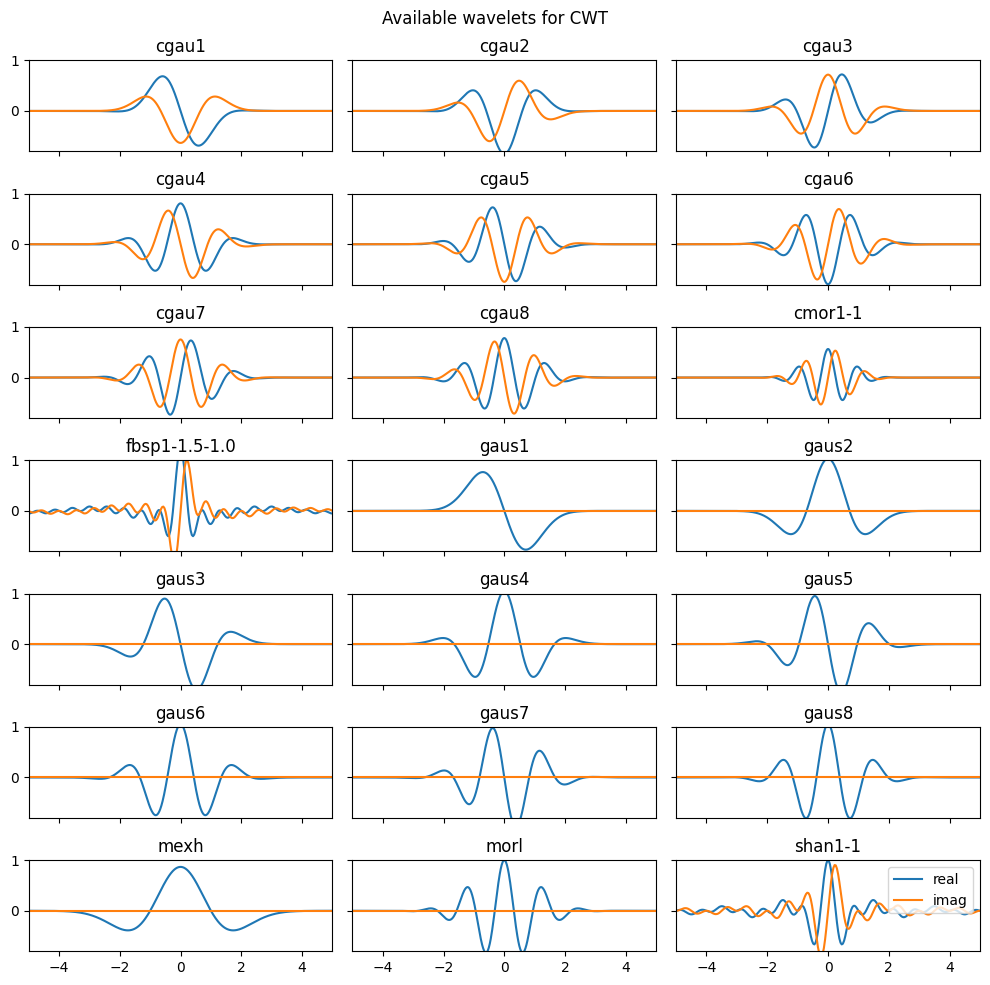

In [29]:
wavlist = pywt.wavelist(kind="continuous")
cols = 3
rows = (len(wavlist) + cols - 1) // cols
fig, axs = plt.subplots(rows, cols, figsize=(10, 10),
                        sharex=True, sharey=True)
for ax, wavelet in zip(axs.flatten(), wavlist):
    # A few wavelet families require parameters in the string name
    if wavelet in ['cmor', 'shan']:
        wavelet += '1-1'
    elif wavelet == 'fbsp':
        wavelet += '1-1.5-1.0'

    [psi, x] = pywt.ContinuousWavelet(wavelet).wavefun(10)
    ax.plot(x, np.real(psi), label="real")
    ax.plot(x, np.imag(psi), label="imag")
    ax.set_title(wavelet)
    ax.set_xlim([-5, 5])
    ax.set_ylim([-0.8, 1])

ax.legend(loc="upper right")
plt.suptitle("Available wavelets for CWT")
plt.tight_layout()
plt.show()

### Daughter Wavelet

A mother wavelet represents the basic wavelet shape that is transformed into varied scaled copies known as daughter wavelets. The daughter wavelets are shifted along the entire signal to match possible frequencies over a finite period of time.

### Sampling Period

The sampling period of the wavelet matches the sample rate of the audio. This can also be known as the time duration that will be used to determine how wavelets will be matched along the signal data.

### Scales

Wavelet matches various frequencies by stretching and shrinking the mother wavelet based on a range of possible scales.

- Stretched Wavelet: A large wavelet will capture large features, low frequencies, slow frequencies
- Shrunk Wavelet: A small wavelet will capture small features and high frequencies, as well as sudden changing frequencies

### Continuous Wavelet Transform (CWT) vs. Discrete Wavelet Transform (DWT)

There are two classes of wavelets: continuous and discrete wavelet transforms. 

The continuous wavelet transform (CWT) are useful when working with time-frequency data and working with changing frequencies. 

From [MathWorks](https://www.mathworks.com/discovery/wavelet-transforms.html):
> Analyzing a hyperbolic chirp signal (left) with two components that vary over time in MATLAB. The short-time Fourier transform (center) does not clearly distinguish the instantaneous frequencies, but the continuous wavelet transform (right) accurately captures them

<p align="center">
  <img src="https://www.mathworks.com/discovery/wavelet-transforms/_jcr_content/mainParsys/image.adapt.full.medium.jpg/1718282330785.jpg" alt="MathWorks CWT example" />
</p>

Discrete wavelets transforms (DWT) are useful when working with images for tasks like denoising or compressing an image while preserving important details.

<p align="center">
  <img src="https://www.mathworks.com/discovery/wavelet-transforms/_jcr_content/mainParsys/image_196046262.adapt.full.medium.jpg/1718282330795.jpg" alt="MathWorks denoising image" />
</p>

---

## Summary
Time series data records a signal over a set interval of time sequences, like the amplitude of a note every 1/10th of a second for music or the temperature every month for weather. Fourier Transform can return the frequency of a signal, but without information about the time when the frequency occurs. Wavelet transform, unlike Fourier Transform, provide a solution for returning both the frequency and time. However, due to Heisenberg's Uncertainty Principle, it is impossible to know both the _exact_ frequency and the _exact_ time that the frequency occurs. Fourier Transform can return highly precise information about the frequencies in a signal and the wavelet transform can return both the frequency and time, but by reducing the precision of the frequency.

### What's next?

**Up next: apply wavelet transforms to determine the order of frequency signals for music and weather analysis!**

## Resources and references
 - [MathWorks Wavelet Transforms](https://www.mathworks.com/discovery/wavelet-transforms.html)
 - [MathWorks: "What is a Wavelet"](https://www.mathworks.com/help/wavelet/gs/what-is-a-wavelet.html)
 